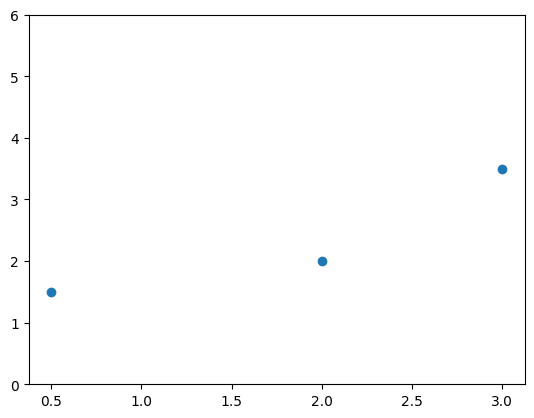

In [6]:
# 오차를 최소로 만드는 방법 : 경사하강법
# 경사 하강법 소스 코드
import matplotlib.pyplot as plt

x = [0.5, 2, 3]
y = [1.5, 2, 3.5]
plt.scatter(x, y)
plt.ylim(0, 6) # y축 범위 설정
plt.show()

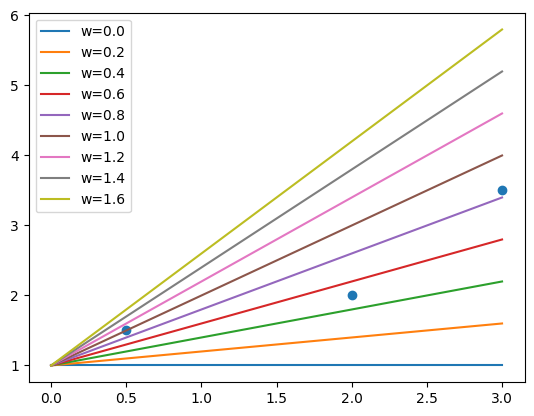

In [7]:
# w값의 변화에 따른 직선 그래프 그려보기
import numpy as np

plt.scatter(x, y)
x = np.arange(4)
w_range = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
for w in w_range:
    y = w * x + 1
    # print(y)
    plt.plot(x, y, label='w=' + str(w))
    plt.legend(loc='upper left')
plt.show()

In [3]:
# w값의 변화에 따른 MSE 값 구하기
data = [(0.5, 1.5), (2, 2), (3, 3.5)]
w_range = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
result = []
b = 1
for w in w_range:
    sum = 0
    n = 0
    for (x, y) in data:
        y_hat = w*x + b
        n += 1
        sum += (y - y_hat)**2 # RSS
    sum /= n # MSE
    result.append(round(sum, 3)) # 소수셋째자리까지 반올림 -> 리스트에 추가
    print(f'w값이 {w}일 때 MSE 값 : {sum:.3f}')
print(result)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    


w값이 0.0일 때 MSE 값 : 2.500
w값이 0.2일 때 MSE 값 : 1.377
w값이 0.4일 때 MSE 값 : 0.607
w값이 0.6일 때 MSE 값 : 0.190
w값이 0.8일 때 MSE 값 : 0.127
w값이 1.0일 때 MSE 값 : 0.417
w값이 1.2일 때 MSE 값 : 1.060
w값이 1.4일 때 MSE 값 : 2.057
w값이 1.6일 때 MSE 값 : 3.407
[2.5, 1.377, 0.607, 0.19, 0.127, 0.417, 1.06, 2.057, 3.407]


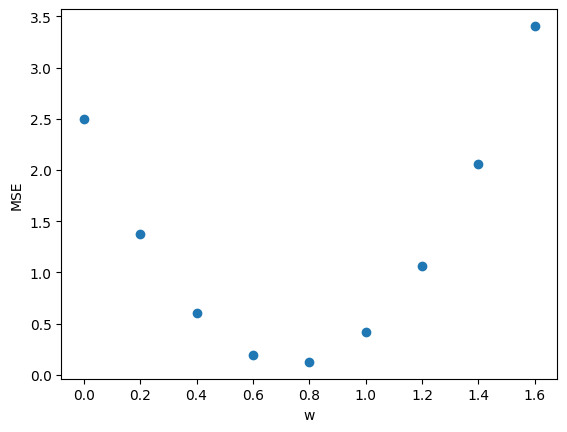

In [4]:
# w값에 따른 MSE값의 변화를 그래프로
plt.scatter(w_range, result)
plt.xlabel('w')
plt.ylabel('MSE')
plt.show()

In [5]:
# 로지스틱 회귀(종속변수가 0 or 1) 실습
# 스팸문자를 구분해 내는 방법
import pandas as pd

filename = r'input\spam.csv'
sms = pd.read_csv(filename, encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
sms = sms.drop(sms.columns[[2, 3, 4]], axis=1) # 불필요한 열 삭제
sms = sms.rename(columns = {'v1' : 'target', 'v2' : 'message'}) # 컬럼이름 변경
sms.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# 워드클라우드 설치 : python -m pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# target컬럼에서 spam 찾아서 message컬럼의 텍스트만 추출해서 문자열 합치기(공백포함) : ''.join()
spam_words = ' '.join(sms.loc[sms['target'] == 'spam']['message'])
spam_words

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

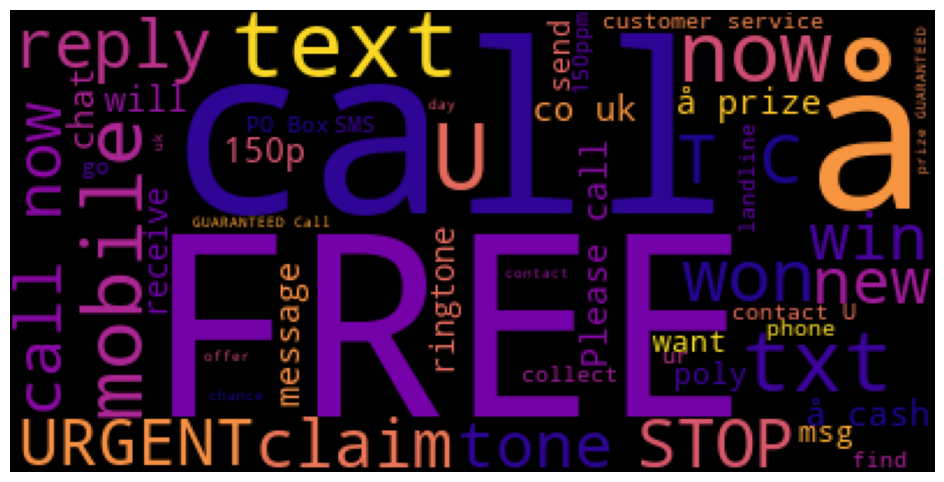

In [ ]:
spam_wc = WordCloud(colormap='plasma', max_words=50).generate(spam_words)
plt.figure(figsize=(24, 6))
plt.axis('off') # x, y축의 눈금 제거
plt.imshow(spam_wc) # 워드 클라우드 출력
plt.show()

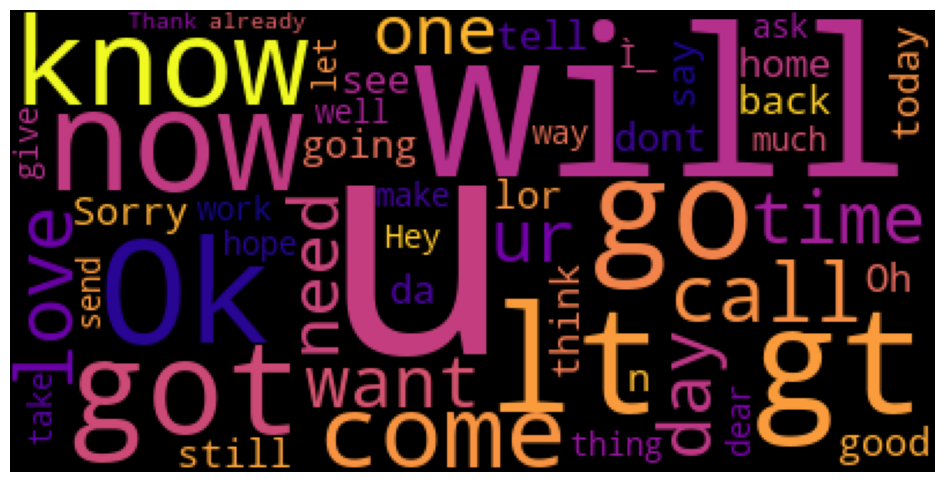

In [12]:
# target 속성값이 'ham'인 message 속성값 
ham_words = ' '.join(sms.loc[sms['target'] == 'ham']['message'])
ham_wc = WordCloud(colormap='plasma', max_words=50).generate(ham_words)

plt.figure(figsize=(24, 6))
plt.axis('off')
plt.imshow(ham_wc)
plt.show()


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

X = sms['message']
y = sms['target']

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(X).toarray() # 텍스트(단어) 수치화(배열형태)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 2500))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5014, 2500) (558, 2500) (5014,) (558,)


In [18]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver='liblinear')
LR_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [19]:
# 모델 테스트 및 평가
y_pred = LR_model.predict(X_test) # 예측값

from sklearn.metrics import accuracy_score

print(f'정확도 : {accuracy_score(y_test, y_pred):.3f}')

정확도 : 0.978


In [20]:
# 혼동행렬 출력
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[464,   1],
       [ 11,  82]])

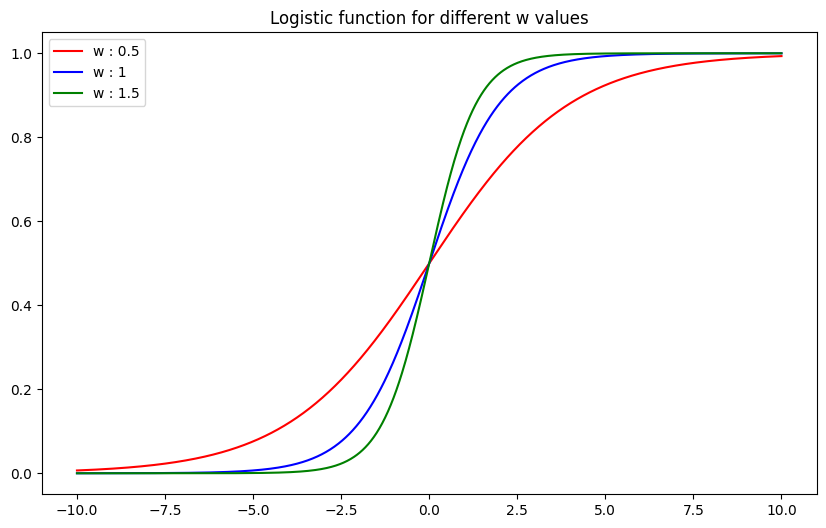

In [24]:
# 로지스틱 함수 -> 코드로 구현하기
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, w, b=0):
    return 1/(1 + np.exp(-(w*x + b)))

x = np.linspace(-10, 10, 1000)
w_values = [0.5, 1, 1.5] # w(가중치)
colors = ['red', 'blue', 'green']
plt.figure(figsize=(10, 6))

for w, color in zip(w_values, colors):
    y = logistic_function(x, w) # 로지스틱 함수 호출
    plt.plot(x, y, color = color, label=f'w : {w}')

plt.title('Logistic function for different w values')
plt.legend()
plt.show()